# summarise_optimal_FCN
- Having fit a FCN with +88.8% accuracy, now summarising architecture and making production quality evaluation metrics.

In [27]:
import keras 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

import harry_plotter as hp
import model_constructors
import evaluate_model
from ann_visualizer.visualize import ann_viz

### Loading in model

In [2]:
model = keras.models.load_model('/Users/chrisduckworth/projects/ML_portfolio/kin_mis_classification/NN/fit-model/optimal_FCN_50epoch_ReduceLRonPlateau/')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                10320     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0

### Architecture summary

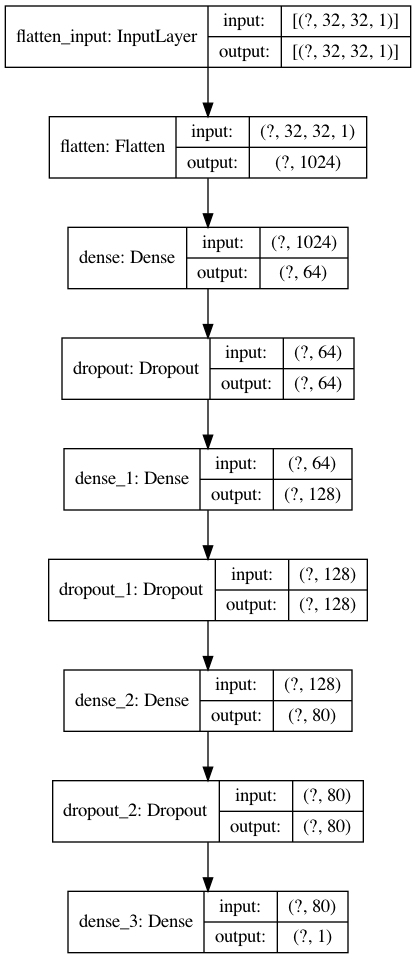

In [18]:
keras.utils.plot_model(model, to_file='FCN_summary_plot.png', show_shapes=True)


### Creating final performance plots

In [24]:
# see ../pre-processing/clean_dataset/ for more info
filepath = '/Users/chrisduckworth/projects/ML_portfolio/kin_mis_classification/NN/pre-processing/clean_dataset_files/'

X_train = np.load(filepath + 'X_train.npy')
X_test = np.load(filepath + 'X_test.npy')
X_val = np.load(filepath + 'X_val.npy')

# adding dimension for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_val = X_val[..., np.newaxis]

y_train = np.load(filepath + 'y_train_binary.npy')
y_test = np.load(filepath + 'y_test_binary.npy')
y_val = np.load(filepath + 'y_val_binary.npy')

# finding model predictions for test set.
y_predict = model.predict(X_test)
y_predict_binary = (y_predict > 0.5).astype("int32")

### Creating histogram of classification distributions.

In [ ]:
bins = np.linspace(0, 1, 11)

fig, ax = plt.subplots()
hp.normalised_histogram(y_test, label='Actual', ax=ax, bins=bins, 
                        style='shadedstep', color='k')
hp.normalised_histogram(y_predict, label='Prediction', ax=ax, bins=bins, 
                        style='shadedstep', color='salmon')
hp.normalised_histogram(y_predict_binary, label='Binary prediction', ax=ax, 
                        bins=bins, style='shadedstep', color='dodgerblue')
ax.legend(frameon=False, fontsize=14)
ax.set_xlabel('Usability', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim([0, 1])
plt.savefig('usability_histogram.png', format='png', bbox_inches='tight')

### Creating confusion matrices (for 0.5 split and more conservative split.)

67/67 [==============================] - 0s 579us/step - loss: 0.3093 - accuracy: 0.8879


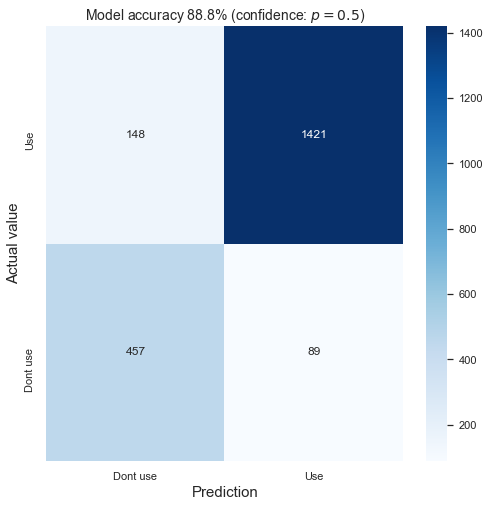

In [72]:
ax = evaluate_model.plot_confusion_matrix(y_test, y_predict_binary, labels=['Dont use', 'Use'])
ax.set_title('Model accuracy ' + str(100*np.round(model.evaluate(X_test, y_test)[1], 3)) + '% (confidence: $p=0.5$)',
             fontsize=14)
plt.savefig('confusion_0.5confidence.png', format='png', bbox_inches='tight')

48/48 [==============================] - 0s 566us/step - loss: 0.2090 - accuracy: 0.9409


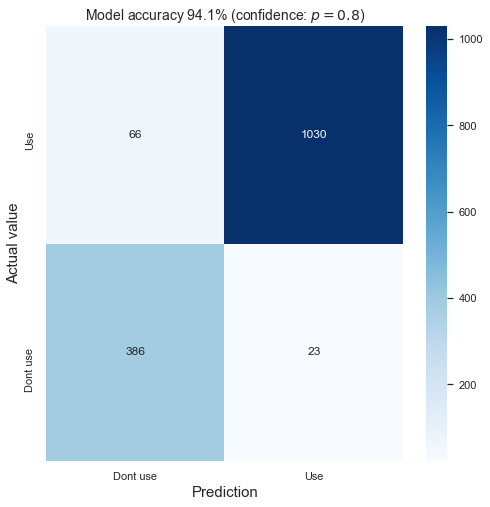

In [93]:
frac = 0.2
mask = (y_predict.ravel() > 1 - frac) | (y_predict.ravel() < frac)

# cutting on when the model is *really* sure.
y_predict_binary_certain = (y_predict.ravel()[mask] > 0.5).astype("int32")
X_test_certain = X_test[mask]
y_test_certain = y_test[mask]

ax = evaluate_model.plot_confusion_matrix(y_test_certain, y_predict_binary_certain, labels=['Dont use', 'Use'])
ax.set_title('Model accuracy ' + str(100*np.round(model.evaluate(X_test_certain, y_test_certain)[1], 3)) + '% (confidence: $p=0.8$)',
             fontsize=14)
plt.savefig('confusion_0.8confidence.png', format='png', bbox_inches='tight')